# Paper general plots and analysis


Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is part of the EStreams publication and was used to provide generate general plots and analsysis. 

Note that this code enables not only the replicability of the current database but also the extrapolation to new catchment areas. 
* Additionally, the user should download and insert the original raw-data in the folder of the same name prior to run this code. 
* The original third-party data used were not made avaialble in this repository due to redistribution and storage-space reasons.  

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* Geopandas=0.10.2
* Pandas
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* estreams_boundaries.shp
* lamah_boundaries.shp
* mghydro_boundaries_AT00009
* riv_pfaf_2_MERIT_Hydro_v07_Basins_v01.shp. Available at: https://www.reachhydro.org/home/params/merit-basins (Last access: 23 November 2023)
* europe.shp
* estreams_network.xlsx
* estreams_timeseries_p.csv
* Files: CAMELS_GB_hydromet_timeseries_{station}_19701001-20150930.csv. Available at: https://doi.org/10.5285/8344e4f3-d2ea-44f5-8afa-86d2987543a9 (Last access 08 December 2023)
* Files: CAMELS_CH_obs_based_{station}.csv. Available at: https://doi.org/10.5281/zenodo.10010004 (Last access 08 December 2023)

**Directory:**

* Clone the GitHub directory locally
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 

## References
* 

## License
* 

# Import modules

In [1]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import glob
from matplotlib.lines import Line2D
import matplotlib as mpl

from utils.general import *

# Configurations

In [2]:
# Only editable variable:
PATH = r"/Users/thiagomedeirosdonascimento/Library/CloudStorage/OneDrive-Personal/PhD/Eawag/Papers/Paper1_Database/Paper"

# Non-editable variables:
PATH_OUTPUT = "results/"
os.chdir(PATH)

# Basin delineation validation
## Import data
### Catchment boundaries

In [3]:
catchment_boundaries = gpd.read_file('data/shapefiles/estreams_catchments.shp')
catchment_boundaries

,id,area_km2,outlet_lat,outlet_lng,area_offic,area_calc,Code,basin_id,label_area,name,layer,path,geometry
0,DE01945,"144,000",50.937000,6.963000,144232,144432.885,DE01945,DE01945,0,BundespegelKoeln,None,None,"POLYGON Z ((7.96208 46.53708 0.00000, 7.96625 ..."
1,DE01946,"148,000",51.226000,6.770000,147680,147934.665,DE01946,DE01946,0,BundespegelDuesseldorf,None,None,"POLYGON Z ((7.96208 46.53708 0.00000, 7.96625 ..."
2,DE01947,"144,000",50.937000,6.963000,144232,144432.885,DE01947,DE01947,0,BundespegelKoeln,None,None,"POLYGON Z ((7.96208 46.53708 0.00000, 7.96625 ..."
3,DE01948,"148,000",51.226000,6.770000,147680,147934.665,DE01948,DE01948,0,BundespegelDuesseldorf,None,None,"POLYGON Z ((7.96208 46.53708 0.00000, 7.96625 ..."
4,DE01949,"159,000",51.757000,6.395000,159300,159352.653,DE01949,DE01949,0,BundespegelRees,None,None,"POLYGON Z ((7.96208 46.53708 0.00000, 7.96625 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15009,NL00015,148,51.812000,4.566000,None,148.000,NL00015,NL00015,888,Puttershoek,Catchment_Boundaries_NL_Merge,C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...,"POLYGON Z ((4.49041 51.82958 0.00000, 4.49041 ..."
15010,NL00016,9500,51.350000,4.251000,None,9500.000,NL00016,NL00016,4,Schaar van Ouden Doel,Catchment_Boundaries_NL_Merge,C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...,"POLYGON Z ((4.18958 51.29875 0.00000, 4.18958 ..."
15011,NL00017,21300,50.830000,5.697000,None,21300.000,NL00017,NL00017,4,Sint Pieter noord,Catchment_Boundaries_NL_Merge,C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...,"POLYGON Z ((4.45041 49.91875 0.00000, 4.45041 ..."
15012,NL00014,3229,52.342353,6.103294,None,3229.000,NL00014,NL00014,6,Olst,Catchment_Boundaries_NL_Merge,C:\Users\nascimth\Documents\Thiago\Eawag\Pytho...,"POLYGON Z ((6.60946 52.15346 0.00000, 6.60837 ..."


### Study area shapefile

In [4]:
shapefile_path = "data/shapefiles/europe.shp"
gdf = gpd.read_file(shapefile_path)

### Network information

In [5]:
network_EU = pd.read_excel("results/estreams_gauging_stations.xlsx")
network_EU.set_index("new_code", inplace = True)
network_EU

,id,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,...,area_calc,area_flag,area_perc,start_date,end_date,num_years,num_months,num_days,num_days_gaps,num_continuous_days
new_code,,,,,,,,,,,,,,,,,,,,,
AT000001,AT00001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,...,4668.379,0,-0.440608,1996-01-01,2019-12-31,24,288,8766,0.0,8766
AT000002,AT00002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,...,102.287,0,-0.281373,1958-10-01,2019-12-31,62,735,22372,0.0,22372
AT000003,AT00003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,...,536.299,0,-0.205344,1985-01-02,2019-12-31,35,420,12782,0.0,12782
AT000004,AT00004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,...,66.286,0,0.471471,1998-01-02,2019-12-31,22,264,8034,0.0,8034
AT000005,AT00005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,...,72.448,0,-0.343490,1990-01-01,2019-12-31,30,360,10957,0.0,10957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,UAGR017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,...,325.370,0,-1.361371,1978-01-01,1987-12-31,10,120,3652,0.0,3652
UAGR0018,UAGR018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,...,47.594,0,4.237425,1978-01-01,1987-12-31,10,120,3652,0.0,3652
UAGR0019,UAGR019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,...,244.731,1,6.233333,1978-01-01,1987-12-31,10,120,3652,0.0,3652


In [6]:
# Replace 'inf' with 'NaN'
network_EU.lat.replace([np.inf, -np.inf], np.nan, inplace=True)
network_EU.lon.replace([np.inf, -np.inf], np.nan, inplace=True)

### Streamflow time-series

In [7]:
timeseries_EU = pd.read_csv("data/streamflow/estreams_timeseries_streamflow.csv", index_col=0)
timeseries_EU.index = pd.to_datetime(timeseries_EU.index)
timeseries_EU.index.name = "dates"

## Number of stations per year:
* Here we can check the number of stations per year:

In [10]:
# First we resample the data to yearly:
timeseries_EU_y = timeseries_EU.resample('Y').count() # First we count the number of days with non NaN values

timeseries_EU_y

,AT00001,AT00002,AT00003,AT00004,AT00005,AT00006,AT00007,AT00008,AT00009,AT00010,...,DE02101,DE02102,DE02103,DE02104,DE02105,DE02106,DE02107,DE02108,DE02109,DE02110
dates,,,,,,,,,,,,,,,,,,,,,
1900-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1903-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,365,365,365,365,365,365,365,365,365,365,...,365,365,365,365,203,365,365,365,365,365
2020-12-31,0,0,0,0,0,0,0,0,0,0,...,366,366,366,366,366,366,366,366,366,366
2021-12-31,0,0,0,0,0,0,0,0,0,0,...,359,365,363,365,365,365,365,365,358,365


In [11]:
# Different threshoulds
summary_per_year = pd.DataFrame()
summary_per_year["less_than_0percent"] = (timeseries_EU_y.T >= 365).sum()
summary_per_year["less_than_1percent"] = (timeseries_EU_y.T > 360).sum()
summary_per_year["less_than_10percent"] = (timeseries_EU_y.T > 328).sum()
summary_per_year["less_than_25percent"] = (timeseries_EU_y.T > 273).sum()
summary_per_year["less_than_50percent"] = (timeseries_EU_y.T > 182).sum()
summary_per_year["less_than_100percent"] = (timeseries_EU_y.T > 0).sum()
summary_per_year

,less_than_0percent,less_than_1percent,less_than_10percent,less_than_25percent,less_than_50percent,less_than_100percent
dates,,,,,,
1900-12-31,16,19,20,20,21,31
1901-12-31,36,36,36,36,37,38
1902-12-31,37,37,37,37,37,39
1903-12-31,37,38,38,38,38,39
1904-12-31,39,39,39,39,39,40
...,...,...,...,...,...,...
2019-12-31,7088,7280,7538,7670,8639,9447
2020-12-31,6567,6671,6884,7060,7214,7877
2021-12-31,5429,5621,5864,6042,6878,7599


# Figure 1
## Define colour schemes:

In [12]:
color_categories = [(0, 5), (5, 10), (10, 20), (20, 40), (40, 80), (80, np.inf)]

legend_title = ""

legend_labels = ["<5","5-10", "10-20", "20-40", "40-80", ">80"]


color_mapping = {
    '0-5': '#A52A2A',   # Brown
    '5-10': '#ff7f0e',  # Orange
    '10-20': '#ffbb78',   # Light Orange
    '20-40': '#aec7e8',  # Light Blue
    '40-80': '#1f77b4',  # Blue
    '80-inf': '#9467bd'    # Purple (colorblind-friendly)
}


color_categories_2 = [(0, 2), (2, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]


legend_title_2 = ""

legend_labels_2 = ["<2","10", "20", "30",  "40", ">40"]

color_mapping_2 = {
    '0-2': '#A52A2A',   # Brown
    '2-10': '#ff7f0e',  # Light Orange
    '10-20': '#ffbb78',   # Orange
    '20-30': '#aec7e8',  # Light Blue
    '30-40': '#1f77b4',  # Blue
    '40-inf': '#9467bd'    # Purple (colorblind-friendly)
}


color_categories_3 = [(1900, 1970), (1970, 1980), (1980, 1990), (1990, 2000), (2000, 2010), (2010, np.inf)]

legend_title_3 = ""

legend_labels_3 = ["<1970","1980", "1990",  "2000", "2010", ">2010"]

color_mapping_3 = {
    '1900-1970': '#9467bd',    # Purple (colorblind-friendly) 
    '1970-1980': '#1f77b4',  # Blue, 
    '1980-1990': '#aec7e8',  # Light Blue
    '1990-2000': '#ffbb78',   # Light Orange
    '2000-2010': '#ff7f0e',  # Orange
    '2010-inf': '#A52A2A',   # Brown
}

## Plot
* Option 1:

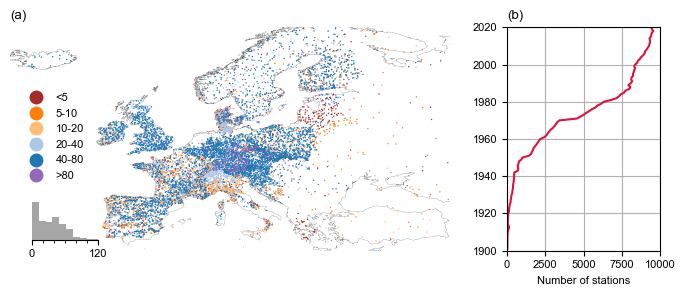

In [14]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')


## Create a function to add circular legend
def add_circular_legend(ax, color_mapping, legend_labels):
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=10) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((0.01, 0.75))  # Adjust legend position

# ... your existing subplot and plot functions ...
# Create a 2x2 subplot grid
#fig, axs = plt.subplots(2, 2, figsize=(8, 6))
fig, axs = plt.subplots(1, 2, figsize=(7, 3),  gridspec_kw={'width_ratios': [3, 1]})

###1:
# Set the background color to white
axs[0].set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs[0], facecolor='white', edgecolor='black', linewidth=0.1)
axs[0].set_xlim(-24, 45) 
axs[0].set_ylim(35, 70)  


# Use the modified function to plot the same data in each subplot
plot_num_measurementsmap_subplot(plotsome = network_EU, xcoords="lon", ycoords="lat", column_labels = "num_years",
                                             color_categories=color_categories, color_mapping=color_mapping, 
                                             legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax = axs[0], 
                                             set_map_limits=True, minx=-22, miny=35, maxx=45, maxy=70, show_legend = False, legend_outside = False, 
                                             north_arrow=False, markersize_map=1)

axs[0].set_axis_off()  # Turn off both x-axis and y-axis
#axs.set_title("(a) Time lenght [years]", loc = "left",  fontweight='bold', fontsize=8, pad=-1) 


# Create a histogram inset axis within the subplot
hist_ax = axs[0].inset_axes([0.05, 0.05, 0.15, 0.175])  # Adjust the values as needed
# Extract the data for the histogram (replace 'column_name' with the actual column you want to plot)
hist_data = network_EU['num_years'].dropna()

# Plot the histogram within the inset axis
hist_ax.hist(hist_data, bins=10, color='gray', alpha=0.7)
hist_ax.set_xlabel('')  # Replace with an appropriate label
hist_ax.set_ylabel('')  # Replace with an appropriate label

# Hide the axis spines and ticks for the inset axis
hist_ax.spines['top'].set_visible(False)
hist_ax.spines['right'].set_visible(False)
hist_ax.spines['left'].set_visible(False)
hist_ax.spines['bottom'].set_visible(True)
hist_ax.set_facecolor('none')
hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=8)

# Adjust y-tick label alignment for the right y-axis
hist_ax.yaxis.tick_right()  # Move the y-tick labels to the right side
hist_ax.yaxis.set_label_position("right")  # Move the y-axis label to the right side

#hist_ax.yaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed
#hist_ax.xaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed

x_ticks = [0, 120]  # Define the specific y-axis tick values you want to show
hist_ax.set_xticks(x_ticks)
#hist_ax.set_xlabel("Years")
# Remove y-axis ticks and labels
hist_ax.set_yticks([])
hist_ax.set_yticklabels([])
hist_ax.xaxis.set_minor_locator(plt.MultipleLocator(base=20))  # Adjust the base as needed
# Set x-axis limits (adjust the values as needed)
hist_ax.set_xlim(0, 120)

# After each subplot creation, call the function to add a circular legend
add_circular_legend(axs[0], color_mapping, legend_labels)

axs[0].set_aspect('equal')  # Adjust aspect ratio as needed
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)


# Define x and y for the plot
x_values = summary_per_year.less_than_100percent
y_values = summary_per_year.index

# Add the line to the plot with explicitly defined x and y
axs[1].plot(x_values, y_values, color="crimson")

start_date = pd.Timestamp('1900')
end_date = pd.Timestamp('2020')
axs[1].set_xlim(0, 10000)  # Use set_xlim to set the x-axis limits
axs[1].set_ylim(start_date, end_date)  # Use set_ylim to set the y-axis limits

axs[1].grid(True)

# Set labels and title with font size
axs[1].set_xlabel('Number of stations', fontweight='normal')
axs[1].set_ylabel('')  # Remove the y-axis label


# Save the figure
fig.tight_layout()  # Adjust the positions of the axes to prevent overlapping elements
#fig.savefig('fig2posterzhydro23.jpeg', dpi=300)

# Show the plot (if needed)
# plt.show()

axs[0].set_title('(a)', loc="left")
axs[1].set_title('(b)', loc="left")

# Adjust layout and remove space between subplots
plt.tight_layout()
#plt.subplots_adjust(hspace=0.5)  # Remove space between subplots

# Save or display the plot
#plt.show()
plt.savefig('results/figure1_spatialdist.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

* Option 2:

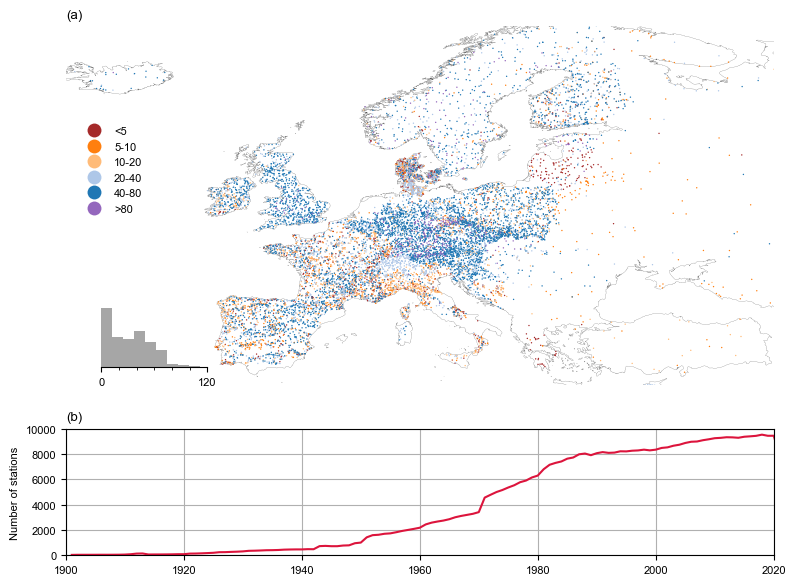

In [91]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')


## Create a function to add circular legend
def add_circular_legend(ax, color_mapping, legend_labels):
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=10) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((0.01, 0.75))  # Adjust legend position

    
# Create a 2x1 subplot grid
fig, axs = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [3, 1]})

###1:
# Set the background color to white
axs[0].set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs[0], facecolor='white', edgecolor='black', linewidth=0.1)
axs[0].set_xlim(-24, 45) 
axs[0].set_ylim(35, 70)  


# Use the modified function to plot the same data in each subplot
plot_num_measurementsmap_subplot(plotsome = network_EU, xcoords="lon", ycoords="lat", column_labels = "num_years",
                                             color_categories=color_categories, color_mapping=color_mapping, 
                                             legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax = axs[0], 
                                             set_map_limits=True, minx=-22, miny=35, maxx=45, maxy=70, show_legend = False, legend_outside = False, 
                                             north_arrow=False, markersize_map=1)

axs[0].set_axis_off()  # Turn off both x-axis and y-axis
#axs.set_title("(a) Time lenght [years]", loc = "left",  fontweight='bold', fontsize=8, pad=-1) 


# Create a histogram inset axis within the subplot
hist_ax = axs[0].inset_axes([0.05, 0.05, 0.15, 0.175])  # Adjust the values as needed
# Extract the data for the histogram (replace 'column_name' with the actual column you want to plot)
hist_data = network_EU['num_years'].dropna()

# Plot the histogram within the inset axis
hist_ax.hist(hist_data, bins=10, color='gray', alpha=0.7)
hist_ax.set_xlabel('')  # Replace with an appropriate label
hist_ax.set_ylabel('')  # Replace with an appropriate label

# Hide the axis spines and ticks for the inset axis
hist_ax.spines['top'].set_visible(False)
hist_ax.spines['right'].set_visible(False)
hist_ax.spines['left'].set_visible(False)
hist_ax.spines['bottom'].set_visible(True)
hist_ax.set_facecolor('none')
hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=8)

# Adjust y-tick label alignment for the right y-axis
hist_ax.yaxis.tick_right()  # Move the y-tick labels to the right side
hist_ax.yaxis.set_label_position("right")  # Move the y-axis label to the right side

#hist_ax.yaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed
#hist_ax.xaxis.set_tick_params(pad=0.5)  # Adjust the padding as needed

x_ticks = [0, 120]  # Define the specific y-axis tick values you want to show
hist_ax.set_xticks(x_ticks)
#hist_ax.set_xlabel("Years")
# Remove y-axis ticks and labels
hist_ax.set_yticks([])
hist_ax.set_yticklabels([])
hist_ax.xaxis.set_minor_locator(plt.MultipleLocator(base=20))  # Adjust the base as needed
# Set x-axis limits (adjust the values as needed)
hist_ax.set_xlim(0, 120)

# After each subplot creation, call the function to add a circular legend
add_circular_legend(axs[0], color_mapping, legend_labels)

axs[0].set_aspect('equal')  # Adjust aspect ratio as needed
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)


# Define x and y for the plot
y_values = summary_per_year.less_than_100percent
x_values = summary_per_year.index

# Add the line to the plot with explicitly defined x and y
axs[1].plot(x_values, y_values, color="crimson")

start_date = pd.Timestamp('1900')
end_date = pd.Timestamp('2020')
axs[1].set_ylim(0, 10000)  # Use set_xlim to set the x-axis limits
axs[1].set_xlim(start_date, end_date)  # Use set_ylim to set the y-axis limits

axs[1].grid(True)

# Set labels and title with font size
axs[1].set_ylabel('Number of stations', fontweight='normal')
axs[1].set_xlabel('')  # Remove the y-axis label

#y_ticks = [0, "", "", "", "", 10000]  # Define the specific y-axis tick values you want to show
#axs[1].set_yticklabels(y_ticks, rotation=90)


axs[0].set_title('(a)', loc="left")
axs[1].set_title('(b)', loc="left")

# Adjust layout and remove space between subplots
plt.tight_layout()
#plt.subplots_adjust(hspace=0.5)  # Remove space between subplots

# Save or display the plot
#plt.show()
plt.savefig('results/figure1_spatialdist_option2.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

* Only the catchments and the gauges:

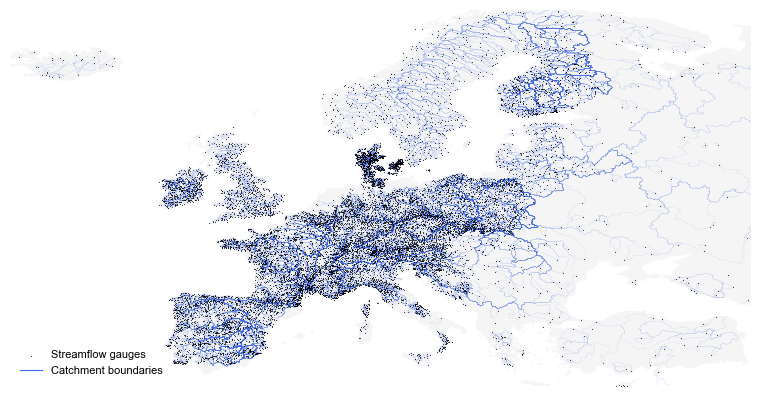

In [122]:
# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.size'] = 8          # Change the font size
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

# Create a 2x1 subplot grid
fig, axs = plt.subplots(1, 1, figsize=(8, 4))

# Set the background color to white
axs.set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
gdf.plot(ax=axs, facecolor='whitesmoke', edgecolor='None', linewidth=0.1)
axs.set_xlim(-24, 45) 
axs.set_ylim(35, 70)  

catchment_boundaries.plot(ax=axs, facecolor='None', edgecolor='royalblue', linewidth=0.05,  alpha=0.70)

axs.set_xlim(-24, 45) 
axs.set_ylim(35, 70)  

# Plot the gauges
axs.scatter(network_EU['lon'], network_EU['lat'], color='black', edgecolor='black',linewidth=0.5,
            marker='o', s=0.05, label = "Streamflow gauges")  # Adjust color, marker, and size as needed

axs.set_aspect('equal')  # Adjust aspect ratio as needed
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.set_axis_off()  # Turn off both x-axis and y-axis

# Plot invisible scatter plot for legend
axs.plot([], [], color='royalblue', linewidth=0.8, label='Catchemnt boundaries')

axs.legend(['Streamflow gauges', 'Catchment boundaries'], loc='lower left', frameon=False)


# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
#plt.show()
plt.savefig('results/figure1_pointsandboundaries.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

# Catchment areas analsysis

In [17]:
network_EU_infos = pd.read_excel("data/streamflow/estreams_network_infos.xlsx")
network_EU_infos.set_index("new_code", inplace = True)
network_EU_infos

,code,name,river,area,elev,lon,lat,country,degimpact,lake,...,calc_Perc2,error_are2,xcoord_3,ycoord_3,manual_del,area_calc,area_calc_,area_calc_label,region,remark
new_code,,,,,,,,,,,,,,,,,,,,,
ITVEN406,270VE,Adige a Albaredo,Adige,11954.0,23.59,11.266291,45.317948,IT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11938.762,0.0,0,NaN,NaN
ITVEN407,283VE,Brenta a Barzizza,Brenta,1567.0,105.38,11.730543,45.777415,IT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1571.329,0.0,0,NaN,NaN
ITVEN408,284VE,Adige a Boara Pisani,Adige,11954.0,8.4,11.784244,45.105481,IT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12020.860,0.0,0,NaN,NaN
ITVEN409,285VE,Tesina a Bolzano Vicentino,Tesina,694.0,37.57,11.620895,45.600894,IT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,759.659,0.0,0,NaN,NaN
ITVEN410,286VE,Frassine a Borgofrassine,Frassine,NaN,16.69,11.481112,45.251409,IT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,414.418,2.0,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NL00013,Megen dorp,Megen dorp,NaN,NaN,NaN,5.566351,51.826878,NL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,28900.000,4.0,4,NaN,but with higher uncertainty
NL00014,Olst,Olst,NaN,NaN,NaN,6.104480,52.342010,NL,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,3229.000,6.0,6,NaN,manual
NL00015,Puttershoek,Puttershoek,NaN,NaN,NaN,4.565993,51.811648,NL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,148.000,888.0,888,NaN,NaN


In [18]:
# Replace 'inf' with 'NaN'
network_EU_infos.xcoord_4.replace([np.inf, -np.inf], np.nan, inplace=True)
network_EU_infos.ycoord_4.replace([np.inf, -np.inf], np.nan, inplace=True)

# Areas' labels

In [7]:
network_EU

,id,gauge_id,gauge_name,gauge_country,gauge_provider,river,lon_snap,lat_snap,lon,lat,...,area_calc,area_flag,area_perc,start_date,end_date,num_years,num_months,num_days,num_days_gaps,num_continuous_days
new_code,,,,,,,,,,,,,,,,,,,,,
AT000001,AT00001,200014,Bangs,AT,AT_EHYD,Rhein,9.534835,47.273748,9.534835,47.273748,...,4668.379,0,-0.440608,1996-01-01,2019-12-31,24,288,8766,0.0,8766
AT000002,AT00002,200048,Schruns (Vonbunweg),AT,AT_EHYD,Litz,9.913677,47.080301,9.913677,47.080301,...,102.287,0,-0.281373,1958-10-01,2019-12-31,62,735,22372,0.0,22372
AT000003,AT00003,231662,Loruens-Aeule,AT,AT_EHYD,Ill,9.847765,47.132821,9.847765,47.132821,...,536.299,0,-0.205344,1985-01-02,2019-12-31,35,420,12782,0.0,12782
AT000004,AT00004,200592,Kloesterle (OEBB),AT,AT_EHYD,Alfenz,10.061843,47.128994,10.061843,47.128994,...,66.286,0,0.471471,1998-01-02,2019-12-31,22,264,8034,0.0,8034
AT000005,AT00005,200097,Buers (Bruecke L82),AT,AT_EHYD,Alvier,9.802668,47.150770,9.802668,47.150770,...,72.448,0,-0.343490,1990-01-01,2019-12-31,30,360,10957,0.0,10957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAGR0017,UAGR017,6682300,BASHTANOVKA,UA,UA_GRDC,KACHA,33.894739,44.691884,33.900000,44.683333,...,325.370,0,-1.361371,1978-01-01,1987-12-31,10,120,3652,0.0,3652
UAGR0018,UAGR018,6682500,YALTA,UA,UA_GRDC,DERE-KIOY,34.166667,44.500000,34.166667,44.500000,...,47.594,0,4.237425,1978-01-01,1987-12-31,10,120,3652,0.0,3652
UAGR0019,UAGR019,6683010,PIONERSKOE,UA,UA_GRDC,SALHYR,34.199841,44.887685,34.200000,44.883333,...,244.731,1,6.233333,1978-01-01,1987-12-31,10,120,3652,0.0,3652


In [10]:
network_EU.columns

Index(['id', 'gauge_id', 'gauge_name ', 'gauge_country', 'gauge_provider',
       'river', 'lon_snap', 'lat_snap', 'lon', 'lat', 'area', 'elevation',
       'area_calc', 'area_flag', 'area_perc', 'start_date', 'end_date',
       'num_years', 'num_months', 'num_days', 'num_days_gaps',
       'num_continuous_days'],
      dtype='object')

In [17]:
abs(network_EU['area_perc'])

new_code
AT000001    0.440608
AT000002    0.281373
AT000003    0.205344
AT000004    0.471471
AT000005    0.343490
              ...   
UAGR0017    1.361371
UAGR0018    4.237425
UAGR0019    6.233333
UAGR0020    3.806184
UAGR0021    3.024055
Name: area_perc, Length: 15014, dtype: float64

In [26]:
diff_1 = (abs(network_EU['area_perc']) <= 1).sum()
diff_1

6437

In [27]:
diff_10 = (abs(network_EU['area_perc']) <= 10).sum()
diff_10

11396

In [21]:
diff_20 = (abs(network_EU['area_perc']) <= 20).sum()
diff_20

12147

In [22]:
diff_30 = (abs(network_EU['area_perc']) <= 30).sum()
diff_30

12456

In [23]:
diff_40 = (abs(network_EU['area_perc']) <= 40).sum()
diff_40

12649

In [24]:
diff_50 = (abs(network_EU['area_perc']) <= 50).sum()
diff_50

12764

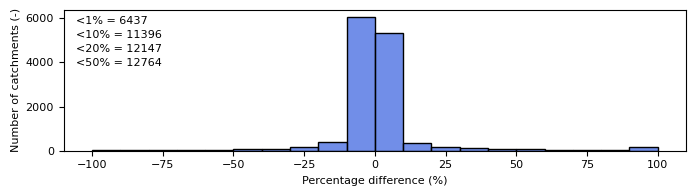

In [40]:
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

fig, axs = plt.subplots(1, figsize=(7, 2))

# Plotting the histogram
# Create a histogram with custom bin edges
bin_edges = [ -100, -90,-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
sns.histplot(network_EU.area_perc, bins=bin_edges, kde=False, color='royalblue', ax=axs)
axs.set_ylabel("Number of catchments (-)")
axs.set_xlabel("Percentage difference (%)")

axs.annotate(f'<1% = {diff_1}', xy=(0.02, 0.9), xycoords='axes fraction', fontsize=8)
axs.annotate(f'<10% = {diff_10}', xy=(0.02, 0.8), xycoords='axes fraction', fontsize=8)
axs.annotate(f'<20% = {diff_20}', xy=(0.02, 0.7), xycoords='axes fraction', fontsize=8)
axs.annotate(f'<50% = {diff_50}', xy=(0.02, 0.6), xycoords='axes fraction', fontsize=8)

# Legend for the second subplot
#axs[1].legend(frameon=False)

fig.tight_layout()

fig.savefig('results/fig_areas_comparison_total.png', dpi=300,  bbox_inches='tight')

In [19]:
# Now we can have a quick overview of our reclassification:
value_counts = network_EU_infos['area_calc_label'].value_counts()
value_counts

area_calc_label
0      11313
999     2226
2        842
3        298
4        244
1        134
888       79
5         68
6         12
Name: count, dtype: int64

In [20]:
842+68

910

Here we can upload our spreadsheet with the full overview of the steps made with the boundaries delineation. In the word file all the steps are fully described, and here the labels "delete", "area_error", "area_erro2" and "manual_deli" show the codes used for each step. All this pre-processing was done in QGIS.

#### At this part we need to reclassify it to the final labels we need to emply in our analysis:

0	- Fully accepted

1 - Accepted after snap

2 - Accepted after check #1	

3 - Accepted after check #2

4 - Accepted after check #3	

5 - Boundaries manually adjusted #1	

6 - Boundaries manually adjusted #2	

888	- Not accepted (karstic and canalization)

999	 - Not accepted


Full details regarding the "not accepted"  can be seen in the full overview sheet:

#### “delete”:

1 – springs

2 – Sea

3 – Canals

4 – Small streams

5 – Lake 

6 – Dam


#### “error_area”:

5 – small strems

6 – high discrepancy and num_years < 1


------------------------------------------------------------------------------------------------------------------------------
The final calculated area is called: area_calc
